# 表現型の類似度を求める

In [4]:
# Move up to top directory
import os
from pathlib import Path

print(os.getcwd())

while not Path("LICENSE").exists():
    os.chdir("../")

print(os.getcwd())

/mnt/e/Research/TSUMUGI-dev
/mnt/e/Research/TSUMUGI-dev


In [5]:
from pathlib import Path
from collections import defaultdict
from itertools import combinations
import csv
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import json

In [6]:
path_data = Path("data", "statistical_filtered.csv")

In [7]:
data = pd.read_csv(path_data)

print(len(data))  # 54059

54059


/tmp/ipykernel_2944389/1717426875.py:1: DtypeWarning: Columns (25,60) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path_data)


In [8]:
file_path = Path("data", "annotation", "symbol_mptermname.json")

symbol_mptermname = json.load(open(file_path))

In [9]:
print(symbol_mptermname["Dpf2"])

['abnormal craniofacial morphology (Homo)', 'abnormal embryo size (Homo)', 'abnormal heart morphology (Homo)', 'abnormal kidney morphology (Hetero)', 'abnormal limb morphology (Homo)', 'abnormal seminal vesicle morphology (Hetero)', 'abnormal tail morphology (Homo)', 'edema (Homo)', 'pallor (Homo)', 'preweaning lethality, complete penetrance (Homo)']


In [10]:
symbol_mptermname = {k: set(v) for k, v in symbol_mptermname.items() if v}
print(symbol_mptermname["Dpf2"])

{'abnormal kidney morphology (Hetero)', 'abnormal limb morphology (Homo)', 'abnormal heart morphology (Homo)', 'preweaning lethality, complete penetrance (Homo)', 'abnormal craniofacial morphology (Homo)', 'abnormal tail morphology (Homo)', 'edema (Homo)', 'pallor (Homo)', 'abnormal seminal vesicle morphology (Hetero)', 'abnormal embryo size (Homo)'}


In [11]:
# with open("data/overlap_ratios.csv", "w") as f_all, open("data/overlap_ratios_filtered.csv", "w") as f_filtered:
#     writer_all = csv.writer(f_all)
#     writer_filtered = csv.writer(f_filtered)
#     writer_all.writerow(["marker1", "marker2", "overlap_ratio", "overlapped_mp_number", "overlapped_mp"])
#     writer_filtered.writerow(["marker1", "marker2", "overlap_ratio", "overlapped_mp_number", "overlapped_mp"])
#     for a, b in combinations(symbol_mptermname, 2):
#         overlapped_mp = symbol_mptermname[a] & symbol_mptermname[b]
#         overlapped_mp_number = len(overlapped_mp)
#         union_mp_number = len(symbol_mptermname[a] | symbol_mptermname[b])
#         overlap_ratio = overlapped_mp_number / union_mp_number

#         overlapped_mp = ",".join(map(str, sorted(overlapped_mp)))

#         if overlapped_mp_number > 0:
#             writer_all.writerow([a, b, round(overlap_ratio, 3), overlapped_mp_number, overlapped_mp])
#         if overlapped_mp_number > 2:
#             writer_filtered.writerow([a, b, round(overlap_ratio, 3), overlapped_mp_number, overlapped_mp])

# # 30s


In [12]:
# Jaccard係数で集合の類似度を計算

overlapped_ratios_all = []

for a, b in combinations(symbol_mptermname, 2):
    overlapped_mp = sorted(symbol_mptermname[a] & symbol_mptermname[b])
    overlapped_mp_number = len(overlapped_mp)
    union_mp_number = len(symbol_mptermname[a] | symbol_mptermname[b])
    overlap_ratio = overlapped_mp_number / union_mp_number

    overlapped_ratios_all.append([a, b, round(overlap_ratio, 3), overlapped_mp_number, overlapped_mp])

## 46s

In [13]:
print(len(overlapped_ratios_all))  # 29996385
print(overlapped_ratios_all[:3])

29996385
[['0610010K14Rik', '0610040J01Rik', 0.0, 0, []], ['0610010K14Rik', '1110059G10Rik', 0.0, 0, []], ['0610010K14Rik', '1500009L16Rik', 0.0, 0, []]]


In [14]:
num_overlapped_mp = 3

overlapped_ratios_filtered = []
for record in overlapped_ratios_all:
    if record[3] >= num_overlapped_mp:
        overlapped_ratios_filtered.append(record)

In [15]:
print(len(overlapped_ratios_filtered))
# Release 21.1: 134880
# Release 22.0: 133281 <- Homo/Hetero/Hemiおよび♂・♀の完全一致を考慮するようになったため、減少
# Phenotypeのfilterの閾値を3以上から2以上: 580458
print(overlapped_ratios_filtered[:3])

133281
[['0610010K14Rik', '4933427D14Rik', 0.5, 3, ['embryonic lethality prior to organogenesis (Homo)', 'embryonic lethality prior to tooth bud stage (Homo)', 'preweaning lethality, complete penetrance (Homo)']], ['0610010K14Rik', 'Acvr1', 0.6, 3, ['embryonic lethality prior to organogenesis (Homo)', 'embryonic lethality prior to tooth bud stage (Homo)', 'preweaning lethality, complete penetrance (Homo)']], ['0610010K14Rik', 'Adss2', 0.375, 3, ['embryonic lethality prior to organogenesis (Homo)', 'embryonic lethality prior to tooth bud stage (Homo)', 'preweaning lethality, complete penetrance (Homo)']]]


In [16]:
Path("data", "overlap").mkdir(exist_ok=True, parents=True)
pickle.dump(overlapped_ratios_all, open("data/overlap/overlapped_ratios_all.pkl", "wb"))
pickle.dump(overlapped_ratios_filtered, open("data/overlap/overlapped_ratios_filtered.pkl", "wb"))

# 18 sec

In [ ]:
df_overlap = pd.DataFrame(overlapped_ratios_all)

In [18]:
df_overlap.columns = ["Gene1", "Gene2", "Jaccard Similarity", "Number of overlapped phenotype", "Overlapped phenotype"]
df_overlap.reindex(
    columns=["Gene1", "Gene2", "Number of overlapped phenotype", "Jaccard Similarity", "Overlapped phenotype"]
)
df_overlap



,Gene1,Gene2,Jaccard Similarity,Number of overlapped phenotype,Overlapped phenotype
0,0610010K14Rik,0610040J01Rik,0.00,0,[]
1,0610010K14Rik,1110059G10Rik,0.00,0,[]
2,0610010K14Rik,1500009L16Rik,0.00,0,[]
3,0610010K14Rik,1600014C10Rik,0.00,0,[]
4,0610010K14Rik,1600029I14Rik,0.00,0,[]
...,...,...,...,...,...
29996380,Zyg11b,Zzz3,0.00,0,[]
29996381,Zyg11b,a,0.00,0,[]
29996382,Zzef1,Zzz3,0.00,0,[]
29996383,Zzef1,a,0.05,1,[abnormal kidney morphology (Homo)]


In [20]:
df_overlap.to_csv("data/TSUMUGI_raw_data.csv.gz", index=False, compression="gzip", lineterminator='\n')
# 3 min

In [ ]:
num_overlapped_mp = 1

overlapped_ratios_filtered = []
for record in overlapped_ratios_all:
    if record[3] >= num_overlapped_mp:
        overlapped_ratios_filtered.append(record)


In [29]:
df_overlap_filtered = pd.DataFrame(overlapped_ratios_filtered)
df_overlap_filtered.columns = ["Gene1", "Gene2", "Jaccard Similarity", "Number of overlapped phenotype", "Overlapped phenotype"]
df_overlap_filtered.reindex(
    columns=["Gene1", "Gene2", "Number of overlapped phenotype", "Jaccard Similarity", "Overlapped phenotype"]
)
df_overlap_filtered

,Gene1,Gene2,Jaccard Similarity,Number of overlapped phenotype,Overlapped phenotype
0,0610010K14Rik,1700003F12Rik,0.167,1,"[preweaning lethality, complete penetrance (Ho..."
1,0610010K14Rik,1700067K01Rik,0.250,1,"[preweaning lethality, complete penetrance (Ho..."
2,0610010K14Rik,2310011J03Rik,0.200,1,"[preweaning lethality, complete penetrance (Ho..."
3,0610010K14Rik,4930444P10Rik,0.125,1,"[preweaning lethality, complete penetrance (Ho..."
4,0610010K14Rik,4933427D14Rik,0.500,3,[embryonic lethality prior to organogenesis (H...
...,...,...,...,...,...
3426162,Zrsr2,Zscan21,0.071,1,[female infertility (Homo)]
3426163,Zswim5,Zzef1,0.067,1,[abnormal coat/hair pigmentation (Homo)]
3426164,Zswim6,Zwilch,0.091,1,[increased mean corpuscular hemoglobin (Hetero...
3426165,Zwilch,Zwint,0.091,1,"[preweaning lethality, complete penetrance (Ho..."


In [ ]:
df_overlap_filtered.to_csv("data/TSUMUGI_filtered_data.csv.gz", index=False, compression="gzip", lineterminator='\n')
df_overlap_filtered.to_json("data/TSUMUGI_filtered_data.json.gz", index=False, compression="gzip", indent=2)
# 1 min

In [23]:
%%bash

ls -lh data/TSUMUGI_raw_data.csv.gz # 100M
zcat data/TSUMUGI_raw_data.csv.gz | head | od -c | head | grep '\n'

-rwxrwxrwx 1 kuno kuno 100M Mar  6 08:50 data/TSUMUGI_raw_data.csv.gz
0000000   G   e   n   e   1   ,   G   e   n   e   2   ,   J   a   c   c
0000060   p   e   d       p   h   e   n   o   t   y   p   e   ,   O   v
0000100   e   r   l   a   p   p   e   d       p   h   e   n   o   t   y
0000120   p   e  \n   0   6   1   0   0   1   0   K   1   4   R   i   k
0000160   .   0   ,   0   ,   [   ]  \n   0   6   1   0   0   1   0   K
0000220   R   i   k   ,   0   .   0   ,   0   ,   [   ]  \n   0   6   1


In [ ]:
%%bash

ls -lh data/TSUMUGI_filtered_data.csv.gz # 21M
zcat data/TSUMUGI_filtered_data.csv.gz | head | od -c | head | grep '\n'

-rwxrwxrwx 1 kuno kuno 21M Mar  6 08:52 data/TSUMUGI_filtered_data.csv.gz
0000000   G   e   n   e   1   ,   G   e   n   e   2   ,   J   a   c   c
0000060   p   e   d       p   h   e   n   o   t   y   p   e   ,   O   v
0000100   e   r   l   a   p   p   e   d       p   h   e   n   o   t   y
0000120   p   e  \n   0   6   1   0   0   1   0   K   1   4   R   i   k
0000200   n   i   n   g       l   e   t   h   a   l   i   t   y   ,    
0000220   c   o   m   p   l   e   t   e       p   e   n   e   t   r   a


In [25]:
%%bash

ls -lh data/TSUMUGI_filtered_data.json.gz # 
zcat data/TSUMUGI_filtered_data.json.gz | head
zcat data/TSUMUGI_filtered_data.json.gz | head | od -c | head | grep '\n'

-rwxrwxrwx 1 kuno kuno 2.7M Mar  6 08:50 data/TSUMUGI_filtered_data.json.gz
{
  "Gene1":{
    "0":"0610010K14Rik",
    "1":"0610010K14Rik",
    "2":"0610010K14Rik",
    "3":"0610010K14Rik",
    "4":"0610010K14Rik",
    "5":"0610010K14Rik",
    "6":"0610010K14Rik",
    "7":"0610010K14Rik",
0000000   {  \n           "   G   e   n   e   1   "   :   {  \n        
0000040   4   R   i   k   "   ,  \n                   "   1   "   :   "
0000060   0   6   1   0   0   1   0   K   1   4   R   i   k   "   ,  \n
0000120   K   1   4   R   i   k   "   ,  \n                   "   3   "
0000160   ,  \n                   "   4   "   :   "   0   6   1   0   0
0000200   1   0   K   1   4   R   i   k   "   ,  \n                   "


In [26]:
# with open("data/overlap_ratios.csv", "a") as f:
#     writer = csv.writer(f)
#     for a in symbol_mptermname:
#         intersect_count = 0
#         union_count = 0
#         overlap = 0
#         writer.writerow([a, a, intersect_count, union_count, overlap])



In [27]:
%%bash

date +"%Y/%m/%d %H:%M:%S"  # Last update

2025/03/06 08:50:50


## Experiment🧑‍🔬: Visualize the number of intersects

- [ ] ひとつの遺伝子において何個くらいの表現形が共通しているのか

In [28]:
overlapped_ratios_all = pickle.load(open("data/overlapped_ratios_all.pkl", "rb"))  # 24s

FileNotFoundError: [Errno 2] No such file or directory: 'data/overlapped_ratios_all.pkl'

In [ ]:
print(overlapped_ratios_all[:3])

[['Rhd', 'Dpf2', 0.0, 0, []], ['Rhd', 'Gna13', 0.0, 0, []], ['Rhd', 'Dynlrb2', 0.0, 0, []]]


In [ ]:
counts = defaultdict(int)
for record in overlapped_ratios_all:
    counts[record[0]] += 0
    counts[record[1]] += 0
    if record[3] > 0:
        counts[record[0]] += 1
        counts[record[1]] += 1

In [ ]:
sort_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))

In [ ]:
print(sort_counts["Rhd"])

867


In [ ]:
print(len(sort_counts))  # 7626

7626


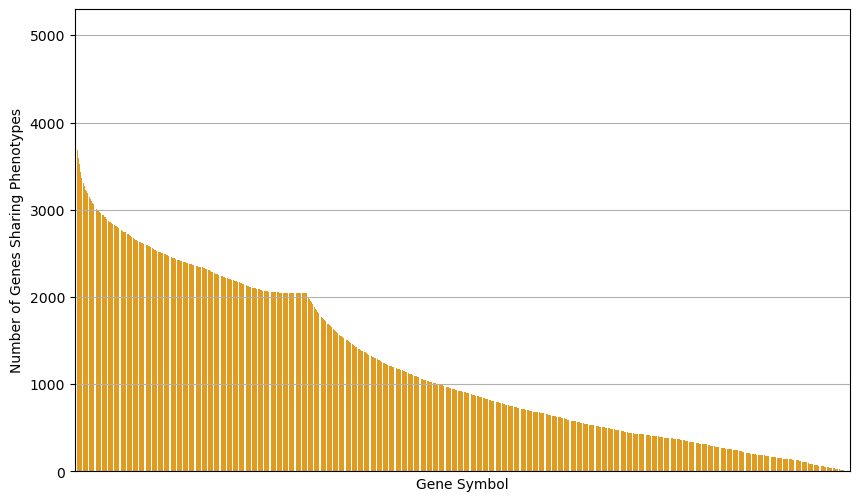

In [ ]:
import seaborn as sns

# Seabornを使ってバーグラフを作成
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sort_counts.keys()), y=list(sort_counts.values()), color="orange")

# X軸ラベルを表示しない
plt.xlabel("Gene Symbols (7626)")
plt.ylabel("Number of Genes Sharing Phenotypes")
plt.xticks([])  # X軸ラベルを非表示にする
plt.grid(axis="y")

# プロットを表示
plt.show()


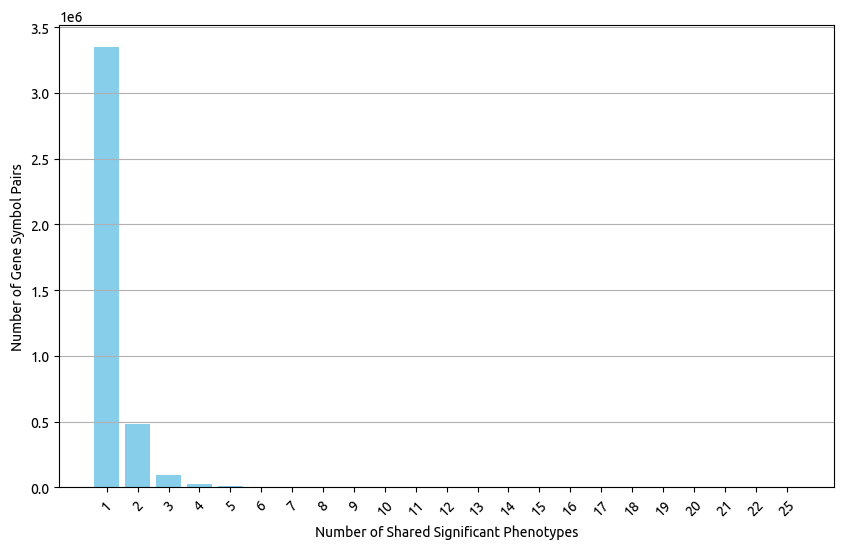

In [ ]:
# # Sort the data by keys to ensure the plot is ordered numerically
# sorted_data = dict(sorted(count_intersect.items(), key=lambda item: int(item[0])))

# # Create a bar plot
# plt.figure(figsize=(10, 6))
# plt.bar(sorted_data.keys(), sorted_data.values(), color="skyblue")
# plt.xlabel("Number of Shared Significant Phenotypes")
# plt.ylabel("Number of Gene Symbol Pairs")
# plt.xticks(rotation=45)
# plt.grid(axis="y")

# # Show the plot
# plt.show()


- A single interaction accounts for 85%.
  - If the network you are visualizing is messy, it might be a good idea to exclude this one interaction.


## Experiment🧑‍🔬: Visualize the overlaps

In [ ]:
path_results = Path("data", "overlap_ratios_py.csv")
with open(path_results, "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    count_overlap = defaultdict(int)
    for row in reader:
        marker1, marker2, intersect_count, union_count, overlap_ratio = row
        count_overlap[float(overlap_ratio)] += 1


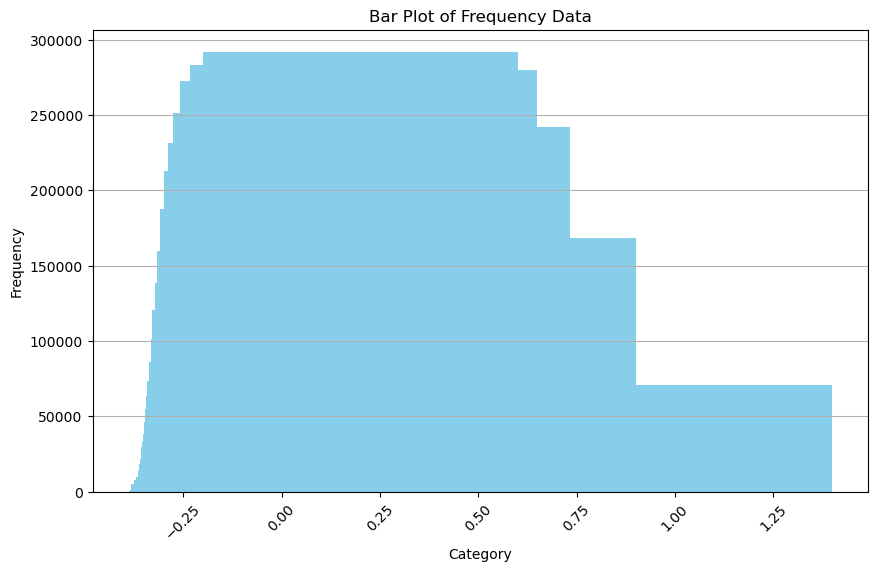

In [ ]:
# Sort the data by keys to ensure the plot is ordered numerically
sorted_data = dict(sorted(count_overlap.items(), key=lambda item: item[0]))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_data.keys(), sorted_data.values(), color="skyblue")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Bar Plot of Frequency Data")
plt.xticks(rotation=45)
plt.grid(axis="y")

# Show the plot
plt.show()


In [ ]:
sorted_data

{0.009: 1,
 0.01: 6,
 0.011: 31,
 0.012: 123,
 0.013: 750,
 0.014: 1386,
 0.015: 1345,
 0.016: 1923,
 0.017: 2643,
 0.018: 4837,
 0.019: 2963,
 0.02: 2747,
 0.021: 2272,
 0.022: 3245,
 0.023: 2929,
 0.024: 3984,
 0.025: 2817,
 0.026: 7787,
 0.027: 5128,
 0.028: 4693,
 0.029: 9842,
 0.03: 5774,
 0.031: 6824,
 0.032: 7768,
 0.033: 8731,
 0.034: 11150,
 0.035: 571,
 0.036: 13510,
 0.037: 15230,
 0.038: 18264,
 0.039: 385,
 0.04: 21824,
 0.041: 516,
 0.042: 25285,
 0.043: 29480,
 0.044: 628,
 0.045: 33109,
 0.046: 62,
 0.047: 670,
 0.048: 38517,
 0.049: 1047,
 0.05: 46240,
 0.051: 1449,
 0.052: 219,
 0.053: 54950,
 0.054: 1722,
 0.055: 241,
 0.056: 63175,
 0.057: 1717,
 0.058: 154,
 0.059: 73730,
 0.06: 200,
 0.061: 2112,
 0.062: 85751,
 0.063: 71,
 0.064: 266,
 0.065: 2823,
 0.066: 88,
 0.067: 101424,
 0.068: 382,
 0.069: 3470,
 0.07: 410,
 0.071: 120682,
 0.072: 13,
 0.073: 487,
 0.074: 4671,
 0.075: 509,
 0.076: 25,
 0.077: 138358,
 0.078: 102,
 0.079: 595,
 0.08: 6186,
 0.081: 551,
 0.

In [ ]:
count_overlap

defaultdict(int,
            {0.167: 282885,
             0.2: 291976,
             0.08: 6186,
             0.071: 120682,
             0.083: 159770,
             0.118: 15517,
             0.05: 46240,
             0.038: 18264,
             0.077: 138358,
             0.043: 29480,
             0.062: 85751,
             0.111: 231292,
             0.143: 272679,
             0.091: 187299,
             0.016: 1923,
             0.059: 73730,
             0.333: 241941,
             0.056: 63175,
             0.045: 33109,
             0.074: 4671,
             0.231: 4674,
             0.154: 24284,
             0.042: 25285,
             0.053: 54950,
             0.067: 101424,
             0.087: 7611,
             0.027: 5128,
             0.057: 1717,
             0.15: 3148,
             0.048: 38517,
             0.014: 1386,
             0.1: 212734,
             0.022: 3245,
             0.357: 272,
             0.037: 15230,
             0.035: 571,
             0.095: 9

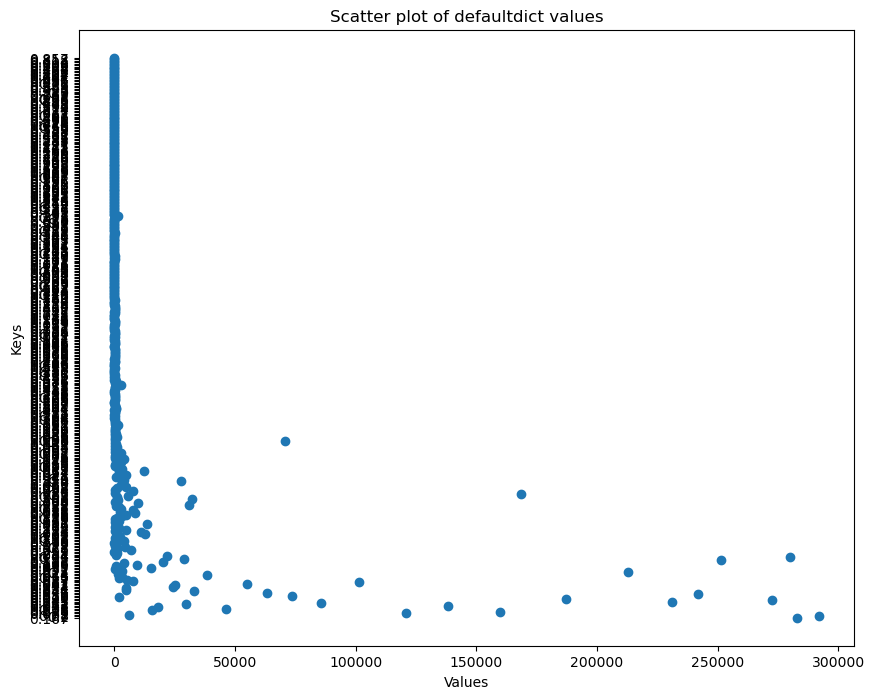

In [ ]:
# データをリストに変換
x = list(count_overlap.keys())
y = list(count_overlap.values())

# 散布図を作成
plt.figure(figsize=(10, 8))
plt.scatter(y, x)
plt.xlabel("Values")
plt.ylabel("Keys")
plt.title("Scatter plot of defaultdict values")
plt.show()